<a href="https://colab.research.google.com/github/AMiller113/Machine_Learning/blob/master/L_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.0.0-beta1
import tensorflow as tf
tf.__version__

     |████████████████████████████████| 87.9MB 53kB/s 
     |████████████████████████████████| 501kB 48.9MB/s 
     |████████████████████████████████| 3.1MB 54.0MB/s 


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

'2.0.0-beta1'

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split # Can be used to create a validation set from the training data
from sklearn.preprocessing import StandardScaler # Can be used to standardize the inputs
import matplotlib.pyplot as plt

In [0]:
data = load_breast_cancer() # data is of type bunch, the values in the bunch however are all ndarrays
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33) # returns a 4 element tuple
N, D = x_train.shape # Shape is an attribute
scaler = StandardScaler() # Scaler object must be instantiated
x_train = scaler.fit_transform(x_train) # Fit generates mu/mean and sigma/stdev, transform warps the dataset
x_test = scaler.transform(x_test) # Using the same paremeters generated by fit_transform we transform the test set 

In [0]:
model = tf.keras.models.Sequential( # Sequentially activate the list of keras layer functopns
    [tf.keras.layers.Input(shape=(D,)), # Passes the shape of the input vector to Keras
     tf.keras.layers.Dense(1, activation='sigmoid') # Dense computes the activation function for the model, the output size and the activation function to be used are the required arguments
     ])
model.compile(optimizer='adam', # The gradient descent optimizer function, adam is the general use case function
                  loss='binary_crossentropy', # There are two labels in the data set so we must use binary cross entropy for the loss function
                  metrics=['accuracy']) # Tells the model what metrics to keep track of while training takes place
r = model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=100) # trains the model, saves the history to r

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 575us/sample - loss: 0.3999 - accuracy: 0.8583 - val_loss: 0.3749 - val_accuracy: 0.8670
Epoch 2/100
381/381 [==============================] - 0s 65us/sample - loss: 0.3724 - accuracy: 0.8688 - val_loss: 0.3496 - val_accuracy: 0.8830
Epoch 3/100
381/381 [==============================] - 0s 74us/sample - loss: 0.3482 - accuracy: 0.8714 - val_loss: 0.3271 - val_accuracy: 0.8830
Epoch 4/100
381/381 [==============================] - 0s 64us/sample - loss: 0.3262 - accuracy: 0.8845 - val_loss: 0.3075 - val_accuracy: 0.8830
Epoch 5/100
381/381 [==============================] - 0s 56us/sample - loss: 0.3080 - accuracy: 0.8976 - val_loss: 0.2900 - val_accuracy: 0.8830
Epoch 6/100
381/381 [==============================] - 0s 66us/sample - loss: 0.2912 - accuracy: 0.9003 - val_loss: 0.2746 - val_

In [0]:
print('Train Score:', model.evaluate(x_train, y_train)) # Shows the training score
print('Test Score:', model.evaluate(x_test,y_test)) # Shows the test score

381/381 [==============================] - 0s 94us/sample - loss: 0.0858 - accuracy: 0.9816
Train Score: [0.08581355734290726, 0.9816273]
188/188 [==============================] - 0s 62us/sample - loss: 0.0714 - accuracy: 0.9894
Test Score: [0.0713891144445602, 0.9893617]


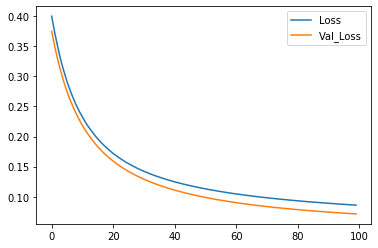

In [0]:
plt.plot(r.history['loss'], label='Loss') #plots the training loss data
plt.plot(r.history['val_loss'], label='Val_Loss') # plots the validation loss data
plt.legend()
plt.show() # shows the graph

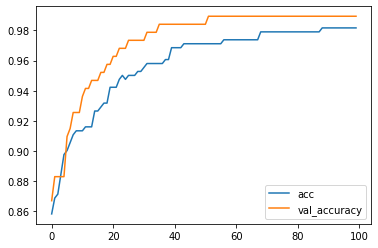

In [0]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label= 'val_accuracy')
plt.legend()
plt.show()

In [0]:
# Save Model
model.save('classifier.h5')

In [0]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Jan  3 00:36 classifier.h5
drwxr-xr-x 1 root root 4.0K Dec 18 16:52 sample_data


In [0]:
# Load model
model_loaded = tf.keras.models.load_model('classifier.h5')
print(model_loaded.layers)
model_loaded.evaluate(x_test,y_test)

ValueError: ignored